# Supplementary Code for BDATA 200 Projects

Included in this iPy Notebook are the core functions and work for 
the data analysis performed in the project. This Repository will be used for
project two and will be updated accordingly. The subheadings correspond
with the function names for quick reference.

## Accessing the Data from IBM and Importing Packages

The data in this study comes from the US Bureau of Transportation Statistics, but is
made available through *IBM's Airline Reporting Carrier On-Time Performance Dataset*. So beyond importing the packages, this cell makes use of code provided by IBM to access the data in a useable format.

Included at the bottom is a sample of the data to save on compute-time in testing.

In [1]:
import statsmodels.formula.api as smf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab
data_path = "airline_2m.csv"
#CSV Can be directly downloaded as a tar file here: 

#https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/airline_2m.tar.gz?_ga=2.241493383.460169643.1645306071-17791737.1643504108

# Credit to IBM's Airline Dataset for the data and encoding code.


data = pd.read_csv(data_path, encoding = "ISO-8859-1",
                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})
#Code Provided By IBMs Airline Reporting Carrier on-time performance set. 
#This helps python better interpret the data frame because it is not encoded in UTF-8 
#An alternative to this could be to actually change the file to be encoded in UTF-8
#but this was difficult to do with how big the file was.

sample = data.sample(1000)
#Create Sample For Examples

### originDelays

In [6]:
def originDelays(df, orig, desto):
    """
    This Function Takes in a dataframe from the Airline Dataset. 
    Then the Data is isolated strictly to the 1 dimensional frame of Arrival
    Delays for flights from one airport (IATA location ID) to another airport (" ").
    
    The arguments follow this format:
    
    originDelays(dataframe,string,string)
    
    
    """
    originSubset = df[df['Origin'] == orig]
    originSubset = originSubset[originSubset['Dest'] == desto ]
    #Shaves the DataFrame so that we are just looking at origin rows
    #Then cuts out desired destinations.
    
    print(originSubset['Origin'])
    #Print Statement To verify the Origin
    print(originSubset['Dest'])
    #Print Statement to verify the Destination

    arvl_delay = originSubset['ArrDelay'].fillna(0)
    #Takes out the Arrival Delay column, adds 0 for the NA spots 
    #NA spots infer no delay from IBMs Dataset
    
    qData = arvl_delay
    #Rename for sake of callability
    
    plt.hist(arvl_delay, bins='auto')
    #Constructs the histogram with automatic sizing
    plt.xlabel('Delay')
    #Delay in Minutes
    plt.ylabel('Frequency')
    #Plot a histogram for verification of data
    plt.show()
    
    print(stats.describe(qData))
    #Descriptive statistics to compare with Histogram
    
    sm.qqplot(qData, stats.norm, fit=True,line ='45', color = 'r', fmt = '.r')
    #The Normal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.skewnorm, fit=True,line ='45', color = 'b', fmt = '.b')
    #The Skewed Normal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.lognorm, fit=True,line ='45', color = 'y', fmt = '.y')
    #The LogNormal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.expon, fit=True,line ='45', color = 'g', fmt = '.g')
    #The Exponential Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.genlogistic, fit=True,line ='45', color = 'g', fmt = '.g')
    #The Logistic Distribution Q-Q Plot
    
    plt.show()

### plotter

In [ ]:
def plotter(dataFrame, xColumn, yColumn):
    """
    This function takes in a dataframe, and two column names to 
    compare in a scatter plot.
    The arguments follow this format:
    plotter(dataframe, x column string, y column string) 
    
    """
    x = dataFrame[xColumn]
    y = dataFrame[yColumn]
    #Renamed x and y for clarity in scatter call
    
    plt.scatter(x,y)
    #Construct the scatter plot
    

### ols_models

In [5]:
def ols_model(df,x, y):
    """
    This Function takes in a dataframe and two columns of that 
    data frame to create a ordinary least squares regression and
    prints out a summary
    the arguments follow this format:
    ols_model(dataframe, dataframe[xcolumn],dataframe[ycolumn])
    
    """
    regression = smf.ols(formula = 'y ~ x', data = df).fit()
    #Performs an Ordinary Least Squares Regression
    
    summary = regression.summary()
    print(summary)
    return 

## Examples of the functions:

In [ ]:
plotter(sample,'AirTime','Distance')
#Example Call of Plotter

In [ ]:
ols_model(sample, sample['ArrDelay'],sample['Distance'])
#Example Call ols_model

367645     PDX
740845     PDX
65275      PDX
407620     PDX
1634332    PDX
464212     PDX
1332397    PDX
740296     PDX
1835867    PDX
1667663    PDX
1002473    PDX
139281     PDX
1097382    PDX
714820     PDX
1625025    PDX
617141     PDX
1484715    PDX
732463     PDX
678219     PDX
515385     PDX
984859     PDX
1251713    PDX
856636     PDX
203505     PDX
528777     PDX
280823     PDX
297424     PDX
1987724    PDX
1921182    PDX
945330     PDX
623122     PDX
558054     PDX
493500     PDX
424576     PDX
1785897    PDX
1452803    PDX
1293819    PDX
559748     PDX
739266     PDX
981195     PDX
751431     PDX
414916     PDX
1570126    PDX
44977      PDX
117226     PDX
1335089    PDX
1957808    PDX
322881     PDX
1313690    PDX
1031813    PDX
1981708    PDX
1867675    PDX
298042     PDX
1011247    PDX
1824913    PDX
765770     PDX
274344     PDX
Name: Origin, dtype: object
367645     LAX
740845     LAX
65275      LAX
407620     LAX
1634332    LAX
464212     LAX
1332397    LAX
740296     L

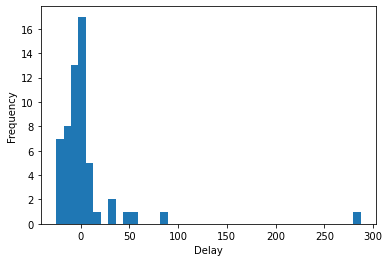

DescribeResult(nobs=57, minmax=(-25.0, 287.0), mean=5.017543859649122, variance=1815.2318295739356, skewness=5.346163722023954, kurtosis=32.178457841367205)


/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".b" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined 

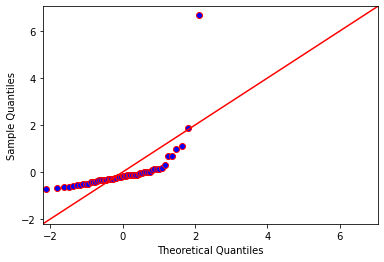

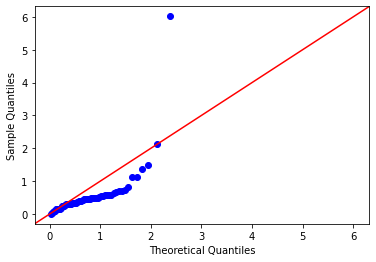

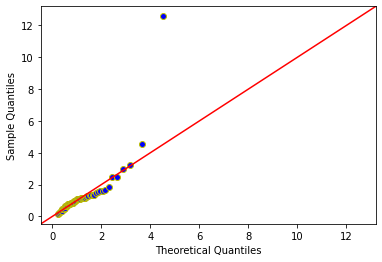

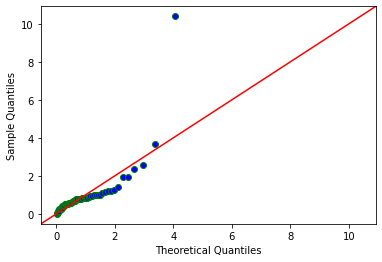

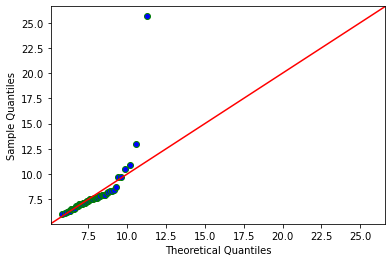

In [22]:
originDelays(sample, 'PDX', 'LAX')

## cdfMaker

In [16]:
def cdfMaker(columnDf):
    """
    This function takes in a dataframe from the Airline Dataset
    and generates a plot of the PMF and CDF of the selected column
    in the dataframe.
    The argument follow this format:
    
    cdfMaker(df['columName'])

    """
    
    data = columnDf.fillna(0)
    #Fills in NA entries with 0
    
    minutes, hist = np.histogram(data, bins='auto')
    #Create histogram named hist and minutes
    #Later, the histogram 'hist' will be used for the plots
    
    pmf = minutes / sum(minutes)
    #pmf is the probability mass function
    # X = "delay in minutes"
    #pmf = P(X = x)
    
    cdf = np.cumsum(pmf)
    #cdf is the cumulative distribution function
    # X = "delay in minutes"
    #cdf = P(X  <= x)

    fig, (ax1,ax2) = plt.subplots(2)
    #Creates the figure with 2 subplots
    fig.suptitle('PMF & CDF')
    #Adds title to entire figure
    ax1.plot(hist[1:], pmf, color="tab:orange", label="PMF")
    #Plots the PMF in orange
    ax2.plot(hist[1:], cdf, color="tab:purple", label="CDF")
    #Plots the CDF in purple.
    
    plt.legend()
    #Shows the legend has ERROR with PMF for now

In [20]:
sample = data.sample(80000)
#Create Sample For Examples

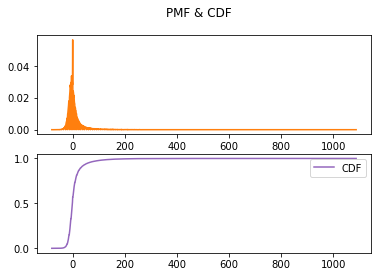

In [21]:
cdfMaker(sample['ArrDelay'])
#Example call of cdfMaker